<a href="https://colab.research.google.com/github/Julianpucheta/HCSPD2022/blob/Julianpucheta-patch-1/SimulRLC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!apt install octave

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  aglfn epstool fonts-droid-fallback fonts-noto-mono ghostscript gnuplot-data
  gnuplot-qt gsfonts imagemagick-6-common info install-info libamd2
  libauthen-sasl-perl libcamd2 libccolamd2 libcholmod3 libcolamd2
  libcupsfilters1 libcupsimage2 libcxsparse3 libdata-dump-perl libemf1
  libencode-locale-perl libfftw3-single3 libfile-listing-perl libfltk-gl1.3
  libfltk1.3 libfont-afm-perl libgail-common libgail18 libglpk40
  libgraphicsmagick++-q16-12 libgraphicsmagick-q16-3 libgs9 libgs9-common
  libgtk2.0-0 libgtk2.0-bin libgtk2.0-common libhtml-form-perl
  libhtml-format-perl libhtml-parser-perl libhtml-tagset-perl
  libhtml-tree-perl libhttp-cookies-perl libhttp-daemon-perl libhttp-date-perl
  libhttp-mess

In [2]:
!apt install octave-signal

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  libslicot0 octave-control
The following NEW packages will be installed:
  libslicot0 octave-control octave-signal
0 upgraded, 3 newly installed, 0 to remove and 62 not upgraded.
Need to get 2,005 kB of archives.
After this operation, 6,288 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libslicot0 amd64 5.0+20101122-3build1 [1,012 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 octave-control amd64 3.0.0-5 [800 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 octave-signal amd64 1.3.2-5 [193 kB]
Fetched 2,005 kB in 1s (1,437 kB/s)
Selecting previously unselected package libslicot0:amd64.
(Reading database ... 163379 fi

In [3]:
!apt install octave-io

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  ant ant-optional dictionaries-common emacsen-common fonts-liberation2
  fonts-opensymbol hunspell-en-us libactivation-java libaopalliance-java
  libapache-poi-java libapache-pom-java libargs4j-java libasm-java
  libatinject-jsr330-api-java libcdi-api-java libcglib-java
  libclucene-contribs1v5 libclucene-core1v5 libcmis-0.5-5v5 libcodemodel-java
  libcommons-cli-java libcommons-codec-java libcommons-collections4-java
  libcommons-compress-java libcommons-io-java libcommons-lang3-java
  libcommons-logging-java libcommons-math3-java libcommons-parent-java
  libcurvesapi-java libdbus-glib-1-2 libdom4j-java libdtd-parser-java libeot0
  libexttextcat-2.0-0 libexttextcat-data libfastinfoset-java
  libgeronimo-a

In [4]:
!apt install octave-control

Reading package lists... Done
Building dependency tree       
Reading state information... Done
octave-control is already the newest version (3.0.0-5).
octave-control set to manually installed.
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 62 not upgraded.


In [5]:
!apt-get install octave-symbolic

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  ipython javascript-common libjs-jquery libjs-sphinxdoc libjs-underscore
  python-backports-shutil-get-terminal-size python-chardet python-configparser
  python-decorator python-enum34 python-future python-gmpy python-ipython
  python-ipython-genutils python-mpmath python-olefile python-pathlib2
  python-pexpect python-pickleshare python-pil python-pkg-resources
  python-prompt-toolkit python-ptyprocess python-pyglet python-pygments
  python-scandir python-simplegeneric python-six python-sympy python-traitlets
  python-wcwidth
Suggested packages:
  apache2 | lighttpd | httpd python-enum34-doc python-future-doc
  python-gmpy-doc python-gmpy2 python-matplotlib python-mpmath-doc
  python-pexpect-doc python-pi

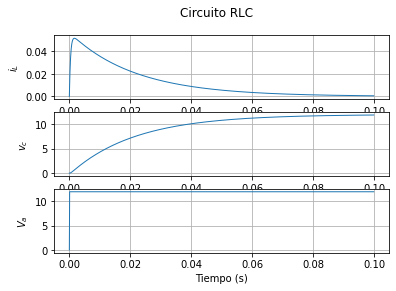

In [15]:
import numpy as np
import scipy as sp
import scipy.signal
from matplotlib import pyplot as plt
from pylab import *
h=1e-4;t_simul=1e-1;R=2.2e2;L=100e-3;C=100e-6;
##h=1e-9;t_simul=1e-3;R=2.2e3;L=10e-6;C=100e-9;
##
A=np.array([[-R/L, -1/L],[1/C,0]])
B=np.array([[1/L],[0]])
x1=np.linspace(0,0,int(t_simul/h))
x2=np.linspace(0,0,int(t_simul/h))
u=np.linspace(0,0,int(t_simul/h))
t=np.linspace(0,0,int(t_simul/h))
Va=np.array([0])
x=np.array([[0],[0]])
xp=np.array([[0],[0]])
####x2=x1 ojo , porque queda igualado para todo el programa
for ii in range(int(t_simul/h)):
  xp=np.matmul(A, x)+B*Va
  x=x+xp*h
  u[ii] = Va
  Va = 12
  x1[ii] = x[0]
  x2[ii] = x[1]
  t[ii] = ii*h
##end
fig, axs = plt.subplots(3)
fig.suptitle('Circuito RLC')
axs[0].plot(t, x1, linewidth =1.0)
axs[0].grid( True )
axs[0].set_ylabel('$i_L$')
axs[1].plot(t, x2, linewidth =1.0)
axs[1].set_ylabel('$v_c$')
axs[1].grid( True )
##plot(t, x2, linewidth =1.0)
axs[2].plot(t, u, linewidth =1.0)
axs[2].grid( True )
axs[2].set_ylabel('$V_a$')
axs[2].set_xlabel('Tiempo (s)')
##title('Motor CC')
grid( True )
show()